In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# download MNIST set
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

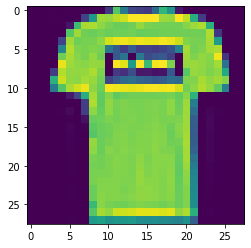

In [4]:
plt.imshow(training_images[1])
# print(training_labels[0])
# print(training_images[0])

ALl the values are between 0 and 255 so we will normalize them to [0,1]

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
class CustomCallback(tf.keras.callbacks.Callback):
    '''Custom Callback used for termination of training when accuracy>80%'''
   
    def __init__(self, accuracy):
        super(CustomCallback, self).__init__()
        self.accuracy = accuracy/100
    
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > self.accuracy:
            print(f'Reached {self.accuracy*100} % accuracy!, Training stopped')
            self.model.stop_training = True

In [7]:
from keras.layers import Flatten, Dense

In [8]:
model = tf.keras.Sequential()
model.add(Flatten()) # turning matrix in a flat array
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax)) # 10 classes outputs 1 or 0

In [9]:
callback=CustomCallback(accuracy=90)

In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15, callbacks=[callback])

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4771 - accuracy: 0.8289
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3599 - accuracy: 0.8680
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3225 - accuracy: 0.8823
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.8889
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.8938
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.8999
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2545 - accuracy: 0.9049
Reached 90.0 % accuracy!, Training stopped


In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8796


[0.3420838713645935, 0.8795999884605408]

#### Exercise 1

We can make a prediction and as a result we obtain the probability of the test_image to belong to one of the 10 classes

In [12]:
classifications = model.predict(test_images)

print(classifications[0])

[2.7462116e-07 3.3246972e-09 3.1540461e-09 2.4530729e-09 1.3138497e-07
 2.0543128e-02 1.6854305e-07 9.0034746e-02 1.6937224e-07 8.8942140e-01]


In [13]:
print(test_labels[0])

9
